## OMLDS End-to-End Machine Learning Project

### Kaggle Credit Fraud Detection Dataset
### Source: https://www.kaggle.com/datasets/kartik2112/fraud-detection

### Date: 07/24/2023

### Objective

The goal in this notebook is to learn and apply several feature selection techniques to the Kaggle Credit Fraud Detection dataset.

### Feature selection

The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build optimized models of studied phenomena.

### Types of Feature Selection Methods

-  Filter methods

    Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods.

-  Wrapper methods

    Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

-  Embedded methods

    These methods encompass the benefits of both the wrapper and filter methods by including interactions of features but also maintaining reasonable computational costs. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

Source: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

In [ ]:
# !pip install seaborn==0.11.2

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.__version__

'0.11.2'

In [3]:
# moount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read train clean sample dataset
df = pd.read_pickle('../../data/credit_card_fraud_sample.pkl')
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,trans_month,trans_day,trans_wday,is_weekend,trans_hour,shop_net,log_city_pop,age_bin_cat,amt_bin,distance_home_buyer_city_state
0,2019-07-25 16:20:35,4587657402165341815,fraud_Hills-Witting,shopping_net,265.89,1,Pembroke Township,IL,60958,41.0646,...,7,25,Thursday,False,16,True,7.666690,0,"83.07 - 30,000",71.79
1,2019-10-23 04:47:17,347612609554823,fraud_Kling Inc,gas_transport,68.21,0,Newport,ME,4953,44.8393,...,10,23,Wednesday,False,4,False,8.079928,0,47.51 - 83.06,0.42
2,2020-03-30 09:50:38,6011652924285713,fraud_DuBuque LLC,grocery_pos,95.39,1,Rocky Mount,MO,65072,38.2911,...,3,30,Monday,False,9,False,7.521859,0,"83.07 - 30,000",3.22
3,2019-01-28 22:32:55,4839615922685395,fraud_Grimes LLC,entertainment,21.39,0,Harrodsburg,IN,47434,39.0130,...,1,28,Monday,False,22,False,4.343805,3,9.65 - 47.50,0.05
4,2019-04-24 15:36:30,4989847570577635369,fraud_Ullrich Ltd,kids_pets,36.53,1,Prosperity,SC,29127,34.1832,...,4,24,Wednesday,False,15,False,9.028099,0,9.65 - 47.50,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,2020-05-03 22:00:57,340214844585279,fraud_Kunde-Sanford,misc_net,859.89,1,Wartburg,TN,37887,36.1016,...,5,3,Sunday,True,22,True,8.924257,3,"83.07 - 30,000",1.80
648333,2019-11-23 23:05:56,30044330818990,"fraud_Moore, Williamson and Emmerich",home,285.39,1,Fort Myers,FL,33967,26.4722,...,11,23,Saturday,True,23,False,12.320548,1,"83.07 - 30,000",12.22
648334,2019-08-13 23:17:58,4149238353975790,fraud_Lemke-Gutmann,shopping_net,870.11,0,Cokeburg,PA,15324,40.1008,...,8,13,Tuesday,False,23,True,6.450470,0,"83.07 - 30,000",0.11
648335,2019-01-31 23:49:23,3550554389581384,"fraud_Streich, Rolfson and Wilderman",kids_pets,19.34,0,Hampton,FL,32044,29.8575,...,1,31,Thursday,False,23,False,7.630947,1,9.65 - 47.50,1.15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648337 entries, 0 to 648336
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trans_date_trans_time           648337 non-null  datetime64[ns]
 1   cc_num                          648337 non-null  object        
 2   merchant                        648337 non-null  object        
 3   category                        648337 non-null  object        
 4   amt                             648337 non-null  float64       
 5   gender                          648337 non-null  int64         
 6   city                            648337 non-null  object        
 7   state                           648337 non-null  object        
 8   zip                             648337 non-null  object        
 9   lat                             648337 non-null  float64       
 10  long                            648337 non-null  float64

In [6]:
# count `is_fraud` (target)
print(df['is_fraud'].value_counts(), '\n')
print(df['is_fraud'].value_counts(normalize = True))

0    644584
1      3753
Name: is_fraud, dtype: int64 

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64


In [7]:
from utils import feature_selection_prep

df_enc = feature_selection_prep(df, one_hot = True, drop_first = True)

In [8]:
df_enc

,amt,gender,lat,long,city_pop,is_fraud,age,log_amt,trans_month,trans_day,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,amt_bin_9.65 - 47.50,amt_bin_47.51 - 83.06,"amt_bin_83.07 - 30,000"
0,265.89,1,41.0646,-87.5917,2135,0,14,5.586837,7,25,...,0,0,0,0,1,0,0,0,0,1
1,68.21,0,44.8393,-69.2675,3228,0,23,4.237145,10,23,...,0,0,0,0,0,0,0,0,1,0
2,95.39,1,38.2911,-92.7059,1847,0,30,4.568402,3,30,...,0,0,0,0,0,0,0,0,0,1
3,21.39,0,39.0130,-86.5457,76,0,63,3.108614,1,28,...,0,0,0,0,0,0,0,1,0,0
4,36.53,1,34.1832,-81.5324,8333,0,24,3.625141,4,24,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,859.89,1,36.1016,-84.5652,7511,1,75,6.757967,5,3,...,0,1,0,0,0,0,0,0,0,1
648333,285.39,1,26.4722,-81.8122,224256,1,33,5.657355,11,23,...,0,0,0,0,0,0,0,0,0,1
648334,870.11,0,40.1008,-80.0652,632,1,29,6.769768,8,13,...,0,0,0,0,1,0,0,0,0,1
648335,19.34,0,29.8575,-82.1483,2060,1,35,3.012589,1,31,...,1,0,0,0,0,0,0,1,0,0


In [9]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648337 entries, 0 to 648336
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             648337 non-null  float64
 1   gender                          648337 non-null  int64  
 2   lat                             648337 non-null  float64
 3   long                            648337 non-null  float64
 4   city_pop                        648337 non-null  int64  
 5   is_fraud                        648337 non-null  int64  
 6   age                             648337 non-null  int64  
 7   log_amt                         648337 non-null  float64
 8   trans_month                     648337 non-null  int64  
 9   trans_day                       648337 non-null  int64  
 10  trans_wday                      648337 non-null  int64  
 11  is_weekend                      648337 non-null  int64  
 12  trans_hour      

#### Test dataset

In [10]:
# read test clean sample dataset
test = pd.read_pickle('../../data/credit_card_fraud_test.pkl')
test

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,trans_month,trans_day,trans_wday,is_weekend,trans_hour,shop_net,log_city_pop,age_bin_cat,amt_bin,distance_home_buyer_city_state
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,0,Columbia,SC,29209,33.9659,...,6,21,Sunday,True,12,False,12.717392,2,0 - 9.64,6.15
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,1,Altonah,UT,84002,40.3207,...,6,21,Sunday,True,12,False,5.713733,0,9.65 - 47.50,9.33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,1,Bellmore,NY,11710,40.6729,...,6,21,Sunday,True,12,False,10.448628,2,9.65 - 47.50,1.02
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,0,Titusville,FL,32780,28.5697,...,6,21,Sunday,True,12,False,10.910861,1,47.51 - 83.06,3.02
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,0,Falmouth,MI,49632,44.2529,...,6,21,Sunday,True,12,False,7.027315,3,0 - 9.64,386.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,0,Luray,MO,63453,40.4931,...,12,31,Thursday,False,23,False,6.253829,2,9.65 - 47.50,2.81
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,0,Lake Jackson,TX,77566,29.0393,...,12,31,Thursday,False,23,False,10.266045,0,"83.07 - 30,000",0.51
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,1,Burbank,WA,99323,46.1966,...,12,31,Thursday,False,23,False,8.212026,1,"83.07 - 30,000",5.35
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,0,Mesa,ID,83643,44.6255,...,12,31,Thursday,False,23,False,4.867534,2,0 - 9.64,0.24


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trans_date_trans_time           555719 non-null  datetime64[ns]
 1   cc_num                          555719 non-null  object        
 2   merchant                        555719 non-null  object        
 3   category                        555719 non-null  object        
 4   amt                             555719 non-null  float64       
 5   gender                          555719 non-null  int64         
 6   city                            555719 non-null  object        
 7   state                           555719 non-null  object        
 8   zip                             555719 non-null  object        
 9   lat                             555719 non-null  float64       
 10  long                            555719 non-null  float64

In [12]:
# count `is_fraud` (target)
print(test['is_fraud'].value_counts(), '\n')
print(test['is_fraud'].value_counts(normalize = True))

0    553574
1      2145
Name: is_fraud, dtype: int64 

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64


In [13]:
test_enc = feature_selection_prep(test, one_hot = True, drop_first = True)
test_enc

,amt,gender,lat,long,city_pop,is_fraud,age,log_amt,trans_month,trans_day,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,amt_bin_9.65 - 47.50,amt_bin_47.51 - 83.06,"amt_bin_83.07 - 30,000"
0,2.86,0,33.9659,-80.9355,333497,0,52,1.350667,6,21,...,0,0,0,1,0,0,0,0,0,0
1,29.84,1,40.3207,-110.4360,302,0,30,3.428813,6,21,...,0,0,0,1,0,0,0,1,0,0
2,41.28,1,40.6729,-73.5365,34496,0,49,3.744314,6,21,...,0,0,0,0,0,0,0,1,0,0
3,60.05,0,28.5697,-80.8191,54767,0,32,4.111693,6,21,...,0,0,1,0,0,0,0,0,1,0
4,3.19,0,44.2529,-85.0170,1126,0,65,1.432701,6,21,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,0,40.4931,-91.8912,519,0,54,3.801538,12,31,...,0,0,0,0,0,0,0,1,0,0
555715,111.84,0,29.0393,-95.4401,28739,0,20,4.725971,12,31,...,1,0,0,0,0,0,0,0,0,1
555716,86.88,1,46.1966,-118.9017,3684,0,38,4.475972,12,31,...,1,0,0,0,0,0,0,0,0,1
555717,7.99,0,44.6255,-116.4493,129,0,54,2.196113,12,31,...,0,0,0,0,0,0,1,0,0,0


In [14]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             555719 non-null  float64
 1   gender                          555719 non-null  int64  
 2   lat                             555719 non-null  float64
 3   long                            555719 non-null  float64
 4   city_pop                        555719 non-null  int64  
 5   is_fraud                        555719 non-null  int64  
 6   age                             555719 non-null  int64  
 7   log_amt                         555719 non-null  float64
 8   trans_month                     555719 non-null  int64  
 9   trans_day                       555719 non-null  int64  
 10  trans_wday                      555719 non-null  int64  
 11  is_weekend                      555719 non-null  int64  
 12  trans_hour      

In [15]:
from utils import woe_category_encoding

df_enc, test_enc = woe_category_encoding(df_enc, test_enc)

In [16]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648337 entries, 0 to 648336
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             648337 non-null  float64
 1   gender                          648337 non-null  int64  
 2   lat                             648337 non-null  float64
 3   long                            648337 non-null  float64
 4   city_pop                        648337 non-null  int64  
 5   is_fraud                        648337 non-null  int64  
 6   age                             648337 non-null  int64  
 7   log_amt                         648337 non-null  float64
 8   trans_month                     648337 non-null  int64  
 9   trans_day                       648337 non-null  int64  
 10  trans_wday                      648337 non-null  int64  
 11  is_weekend                      648337 non-null  int64  
 12  trans_hour      

In [17]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             555719 non-null  float64
 1   gender                          555719 non-null  int64  
 2   lat                             555719 non-null  float64
 3   long                            555719 non-null  float64
 4   city_pop                        555719 non-null  int64  
 5   is_fraud                        555719 non-null  int64  
 6   age                             555719 non-null  int64  
 7   log_amt                         555719 non-null  float64
 8   trans_month                     555719 non-null  int64  
 9   trans_day                       555719 non-null  int64  
 10  trans_wday                      555719 non-null  int64  
 11  is_weekend                      555719 non-null  int64  
 12  trans_hour      

In [18]:
# compare train and test dataframes
def compare_df(df_1, df_2):

    if sorted(list(df_1.columns)) == sorted(list(df_2.columns)):
        print("dataframes have same column names")
        if df_1.dtypes.sort_index().equals(df_2.dtypes.sort_index()):
            print("dataframes have same column types")
        else:
            print("dataframes have different column types")
    else:
        print("dataframes have different column names")

In [19]:
compare_df(df_enc, test_enc)

dataframes have same column names
dataframes have same column types


In [20]:
# save df_enc to pickle file
# df_enc.to_pickle('./data/train_not_encoded.pkl')
# df_enc.to_pickle('../../data/train_encoded.pkl')

In [21]:
# save test_enc to pickle file
# test_enc.to_pickle('./data/test_not_encoded.pkl')
# test_enc.to_pickle('../../data/test_encoded.pkl')

## Filter methods

### Correlation coefficient

In [20]:
# Pearson correlation
corr = df_enc.corr()

<AxesSubplot:>

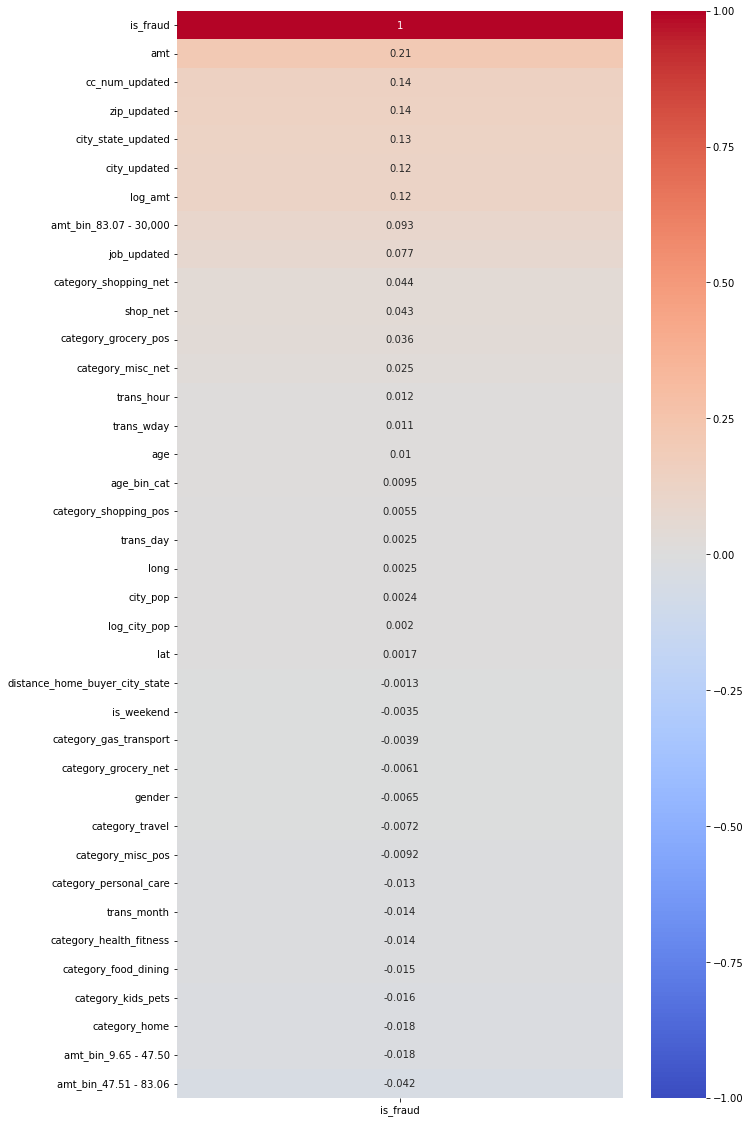

In [21]:
# correlation for `is_fraud` in descending order heatmap
plt.figure(figsize = (10, 20))
sns.heatmap(corr[['is_fraud']].sort_values(by=['is_fraud'], ascending=False), vmin=-1, cmap='coolwarm', annot=True)

In [22]:
corr[['is_fraud']].sort_values(by=['is_fraud'], ascending=False)

,is_fraud
is_fraud,1.000000
amt,0.214314
cc_num_updated,0.141441
zip_updated,0.140076
city_state_updated,0.126621
city_updated,0.123321
log_amt,0.119271
"amt_bin_83.07 - 30,000",0.092990
job_updated,0.076574
category_shopping_net,0.043836


Comment: Correlation of `is_fraud` (target) to each feature range is between -0.017 to 0.207. We could use a threshold of 0.70 safely to remove highly correlated features without eliminating moderate features correlating with the target.

In [23]:
# remove correlated features with coefficient higher than 0.70

threshold = 0.70

# first, let's drop `case_score`
df_matrix = df_enc.drop(['is_fraud'], axis=1)

# create a positive correlation matrix
corr_abs = df_matrix.corr().abs()

# create and apply True/False mask
mask = np.triu(np.ones_like(corr_abs, dtype=bool))
tri_df = corr_abs.mask(mask)

# list column names of highly correlated features (r > threshold = 0.7)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  threshold)]

print('Features to be removed: ', to_drop)

Features to be removed:  ['age', 'city_state_updated', 'city_updated', 'zip_updated']


In [24]:
# drop the features in the to_drop list
df_reduced = df_enc.drop(to_drop, axis=1)
print("The reduced dataframe has {} columns.".format(df_reduced.shape[1]))

The reduced dataframe has 34 columns.


In [25]:
df_reduced.head()

,amt,gender,lat,long,city_pop,is_fraud,log_amt,trans_month,trans_day,trans_wday,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,amt_bin_9.65 - 47.50,amt_bin_47.51 - 83.06,"amt_bin_83.07 - 30,000"
0,265.89,1,41.0646,-87.5917,2135,0,5.586837,7,25,4,...,0,0,0,0,1,0,0,0,0,1
1,68.21,0,44.8393,-69.2675,3228,0,4.237145,10,23,3,...,0,0,0,0,0,0,0,0,1,0
2,95.39,1,38.2911,-92.7059,1847,0,4.568402,3,30,1,...,0,0,0,0,0,0,0,0,0,1
3,21.39,0,39.0130,-86.5457,76,0,3.108614,1,28,1,...,0,0,0,0,0,0,0,1,0,0
4,36.53,1,34.1832,-81.5324,8333,0,3.625141,4,24,3,...,1,0,0,0,0,0,0,1,0,0


### SelectKBest

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the *SelectKBest* class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the **ANOVA F-value method** is appropriate for numerical inputs and categorical data. This can be used via the `f_classif()` function. We will select the 20 best features using this method in the example below.

In [26]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648337 entries, 0 to 648336
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             648337 non-null  float64
 1   gender                          648337 non-null  int64  
 2   lat                             648337 non-null  float64
 3   long                            648337 non-null  float64
 4   city_pop                        648337 non-null  int64  
 5   is_fraud                        648337 non-null  int64  
 6   age                             648337 non-null  int64  
 7   log_amt                         648337 non-null  float64
 8   trans_month                     648337 non-null  int64  
 9   trans_day                       648337 non-null  int64  
 10  trans_wday                      648337 non-null  int64  
 11  is_weekend                      648337 non-null  int64  
 12  trans_hour      

In [27]:
# drop target columns
drop_cols=['is_fraud']

X = df_enc.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)

y = df['is_fraud'] # y = target column (what we want to predict)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [29]:
#  X preprocessing

# standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k = 20)
fit = best_features.fit(X_scaled, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [31]:
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features

               Feature_Name         Score
0                       amt  31212.052534
20           cc_num_updated  13235.161800
18              zip_updated  12975.761332
16       city_state_updated  10564.009388
17             city_updated  10012.265136
6                   log_amt   9356.071383
36   amt_bin_83.07 - 30,000   5655.106371
19              job_updated   3824.018106
31    category_shopping_net   1248.262154
12                 shop_net   1210.488440
35    amt_bin_47.51 - 83.06   1162.903095
24     category_grocery_pos    820.621639
28        category_misc_net    402.300046
34     amt_bin_9.65 - 47.50    206.794978
26            category_home    201.059480
27       category_kids_pets    166.207505
21     category_food_dining    137.601740
25  category_health_fitness    129.982089
7               trans_month    125.608346
30   category_personal_care    102.570982


In [32]:
selected_features_lst = feature_scores.nlargest(20, 'Score')['Feature_Name'].to_list()
selected_features_lst

['amt',
 'cc_num_updated',
 'zip_updated',
 'city_state_updated',
 'city_updated',
 'log_amt',
 'amt_bin_83.07 - 30,000',
 'job_updated',
 'category_shopping_net',
 'shop_net',
 'amt_bin_47.51 - 83.06',
 'category_grocery_pos',
 'category_misc_net',
 'amt_bin_9.65 - 47.50',
 'category_home',
 'category_kids_pets',
 'category_food_dining',
 'category_health_fitness',
 'trans_month',
 'category_personal_care']

In [33]:
# save SelectKBest features to pickle file
# df_enc[selected_features_lst].to_pickle('../../data/train_enc_select_K_best.pkl')
# test_enc[selected_features_lst].to_pickle('../../data/test_enc_select_K_best.pkl')

## Wrapper methods

### BorutaShap Feature Selection

#### Source: https://pypi.org/project/BorutaShap/

In [34]:
from BorutaShap import BorutaShap
# from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [35]:
df_enc['is_fraud'].value_counts()

0    644584
1      3753
Name: is_fraud, dtype: int64

In [36]:
# instantiate Random Forest Classifier model
model = XGBClassifier(scale_pos_weight = 172, n_jobs = -1)

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

In [37]:
Feature_Selector.fit(X=X, y=y, n_trials=20, random_state=123)

  0%|          | 0/20 [00:00<?, ?it/s]

[17:18:31] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|▌         | 1/20 [11:29<3:38:19, 689.45s/it]

[17:30:01] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|█         | 2/20 [24:54<3:47:13, 757.43s/it]

[17:43:26] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|█▌        | 3/20 [31:24<2:47:00, 589.46s/it]

[17:49:55] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|██        | 4/20 [46:41<3:11:42, 718.88s/it]

[18:05:13] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 25%|██▌       | 5/20 [52:43<2:27:35, 590.37s/it]

[18:11:15] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|███       | 6/20 [1:14:55<3:16:35, 842.53s/it]

[18:33:27] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 35%|███▌      | 7/20 [1:39:46<3:48:29, 1054.57s/it]

[18:58:18] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████      | 8/20 [1:45:20<2:45:00, 825.07s/it] 

[19:03:52] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 45%|████▌     | 9/20 [2:06:59<2:58:25, 973.26s/it]

[19:25:31] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████     | 10/20 [2:29:04<3:00:17, 1081.72s/it]

[19:47:34] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|█████▌    | 11/20 [3:05:35<3:33:11, 1421.30s/it]

[20:24:05] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|██████    | 12/20 [3:57:20<4:17:46, 1933.33s/it]

[21:15:50] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 65%|██████▌   | 13/20 [4:48:23<4:25:30, 2275.76s/it]

[22:06:54] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|███████   | 14/20 [5:08:27<3:15:11, 1951.92s/it]

[22:26:57] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|███████▌  | 15/20 [5:45:33<2:49:32, 2034.51s/it]

[23:04:03] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████  | 16/20 [6:07:01<2:00:39, 1809.99s/it]

[23:25:32] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|████████▌ | 17/20 [6:26:48<1:21:08, 1622.67s/it]

[23:45:19] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████ | 18/20 [6:36:53<43:53, 1316.83s/it]  

[23:55:24] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|█████████▌| 19/20 [6:40:56<16:34, 994.26s/it] 

[23:59:26] WARNING: /private/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/pip-install-kaocgsot/xgboost_945be1680f9c43d29385dd7c6324fea2/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 20/20 [6:45:09<00:00, 1215.49s/it]

7 attributes confirmed important: ['age', 'category_shopping_net', 'amt', 'category_shopping_pos', 'trans_hour', 'cc_num_updated', 'category_gas_transport']
25 attributes confirmed unimportant: ['age_bin_cat', 'is_weekend', 'amt_bin_47.51 - 83.06', 'gender', 'long', 'distance_home_buyer_city_state', 'log_city_pop', 'category_misc_net', 'amt_bin_83.07 - 30,000', 'category_grocery_pos', 'city_state_updated', 'city_updated', 'category_kids_pets', 'job_updated', 'trans_month', 'shop_net', 'amt_bin_9.65 - 47.50', 'trans_wday', 'log_amt', 'category_misc_pos', 'category_grocery_net', 'category_travel', 'category_personal_care', 'lat', 'category_health_fitness']
5 tentative attributes remains: ['category_food_dining', 'city_pop', 'category_home', 'trans_day', 'zip_updated']


In [38]:
Feature_Selector.TentativeRoughFix()

2 tentative features are now accepted: ['city_pop' 'category_home']
3 tentative features are now rejected: ['category_food_dining' 'trans_day' 'zip_updated']


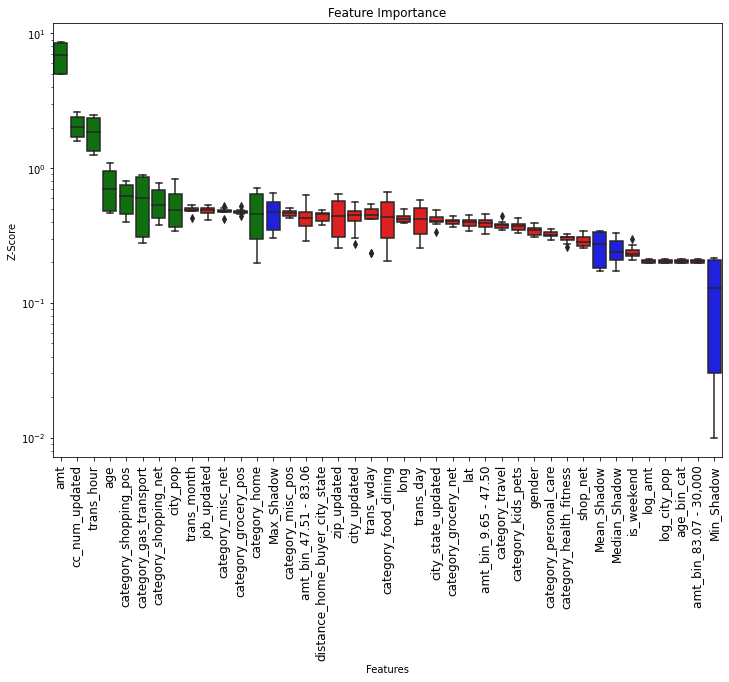

In [39]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12, 8),
            y_scale='log', which_features='all')

In [40]:
Feature_Selector.accepted_columns

[array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['amt', 'age', 'trans_hour', 'cc_num_updated',
        'category_gas_transport', 'category_shopping_pos'], dtype=object),
 array(['amt', 'age', 'trans_hour', 'cc_num_updated',
        'category_shopping_pos'], dtype=object),
 array(['amt', 'age', 'trans_hour', 'cc_num_updated',
        'category_shopping_net', 'category_shopping_pos'], dtype=object),
 array(['amt', 'age', 'trans_hour', 'cc_num_updated',
        'category_shopping_net', 'category_shopping_pos'], dtype=object),
 array(['amt', 'age', 'trans_hour', 'cc_num_updated',
        'category_shopping_net', 'category_shopping_pos'], dtype=object),
 array(['amt', 'age', 'trans_hour', 'cc_num_updated',
        'category_shopping_net', 'category_shopping_pos'], dtype=object),
 array(['amt', 'age', 

In [41]:
Feature_Selector.accepted

['age',
 'category_shopping_net',
 'amt',
 'category_shopping_pos',
 'trans_hour',
 'cc_num_updated',
 'category_gas_transport',
 'city_pop',
 'category_home']

In [42]:
df_enc[Feature_Selector.accepted]

,age,category_shopping_net,amt,category_shopping_pos,trans_hour,cc_num_updated,category_gas_transport,city_pop,category_home
0,14,1,265.89,0,16,-1.437889,0,2135,0
1,23,0,68.21,0,4,2.013986,1,3228,0
2,30,0,95.39,0,9,-1.077717,0,1847,0
3,63,0,21.39,0,22,-0.703805,0,76,0
4,24,0,36.53,0,15,-1.077056,0,8333,0
...,...,...,...,...,...,...,...,...,...
648332,75,0,859.89,0,22,11.023256,0,7511,0
648333,33,0,285.39,0,23,-0.040268,0,224256,1
648334,29,1,870.11,0,23,0.044638,0,632,0
648335,35,0,19.34,0,23,0.940827,0,2060,0


In [44]:
# save Boruta Shap selected features to pickle file
# df_enc[Feature_Selector.accepted].to_pickle('../../data/train_enc_Boruta_Shap_selected.pkl')
# test_enc[Feature_Selector.accepted].to_pickle('../../data/test_enc_Boruta_Shap_selected.pkl')

## Ensemble methods

### Lasso Regularization (L1)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [47]:
# set regularization parameter C=0.1
logistic = LogisticRegression(C=0.1, penalty = 'l1', solver = 'liblinear', 
                              random_state = 123).fit(X_scaled, y)

model = SelectFromModel(logistic, prefit=True)

In [48]:
# selected columns
selected_columns = list(X.columns[model.get_support()])
print('Number of features selected: ', len(selected_columns))
print('Feature names', selected_columns)

Number of features selected:  30
Feature names ['amt', 'gender', 'long', 'city_pop', 'age', 'log_amt', 'trans_month', 'trans_day', 'trans_wday', 'is_weekend', 'trans_hour', 'log_city_pop', 'distance_home_buyer_city_state', 'job_updated', 'cc_num_updated', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'amt_bin_9.65 - 47.50', 'amt_bin_47.51 - 83.06', 'amt_bin_83.07 - 30,000']


In [49]:
selected_columns

['amt',
 'gender',
 'long',
 'city_pop',
 'age',
 'log_amt',
 'trans_month',
 'trans_day',
 'trans_wday',
 'is_weekend',
 'trans_hour',
 'log_city_pop',
 'distance_home_buyer_city_state',
 'job_updated',
 'cc_num_updated',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'amt_bin_9.65 - 47.50',
 'amt_bin_47.51 - 83.06',
 'amt_bin_83.07 - 30,000']

In [50]:
df_enc[selected_columns]

,amt,gender,long,city_pop,age,log_amt,trans_month,trans_day,trans_wday,is_weekend,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,amt_bin_9.65 - 47.50,amt_bin_47.51 - 83.06,"amt_bin_83.07 - 30,000"
0,265.89,1,-87.5917,2135,14,5.586837,7,25,4,0,...,0,0,0,0,1,0,0,0,0,1
1,68.21,0,-69.2675,3228,23,4.237145,10,23,3,0,...,0,0,0,0,0,0,0,0,1,0
2,95.39,1,-92.7059,1847,30,4.568402,3,30,1,0,...,0,0,0,0,0,0,0,0,0,1
3,21.39,0,-86.5457,76,63,3.108614,1,28,1,0,...,0,0,0,0,0,0,0,1,0,0
4,36.53,1,-81.5324,8333,24,3.625141,4,24,3,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,859.89,1,-84.5652,7511,75,6.757967,5,3,0,1,...,0,1,0,0,0,0,0,0,0,1
648333,285.39,1,-81.8122,224256,33,5.657355,11,23,6,1,...,0,0,0,0,0,0,0,0,0,1
648334,870.11,0,-80.0652,632,29,6.769768,8,13,2,0,...,0,0,0,0,1,0,0,0,0,1
648335,19.34,0,-82.1483,2060,35,3.012589,1,31,4,0,...,1,0,0,0,0,0,0,1,0,0


In [51]:
# save df_enc[selected_columns] to pickle
# df_enc[selected_columns].to_pickle('../../data/train_enc_selected_columns.pkl')
# test_enc[selected_columns].to_pickle('../../data/test_enc_selected_columns.pkl')

### Forward Selection

In [52]:
from sklearn.feature_selection import SequentialFeatureSelector

In [53]:
# set regularization parameter C=0.1
logistic = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 123)

model = SequentialFeatureSelector(logistic, n_features_to_select = 20, n_jobs = -1)

model.fit(X_scaled, y)

SequentialFeatureSelector(estimator=LogisticRegression(C=0.1, penalty='l1',
                                                       random_state=123,
                                                       solver='liblinear'),
                          n_features_to_select=20, n_jobs=-1)

In [54]:
# selected columns
selected_columns_fwd = list(X.columns[model.get_support()])
print('Number of features selected: ', len(selected_columns_fwd))
print('Feature names', selected_columns_fwd)

Number of features selected:  20
Feature names ['amt', 'gender', 'lat', 'long', 'city_pop', 'age', 'log_amt', 'trans_month', 'trans_day', 'trans_wday', 'is_weekend', 'trans_hour', 'shop_net', 'cc_num_updated', 'category_gas_transport', 'category_grocery_pos', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'amt_bin_9.65 - 47.50']


In [55]:
df_enc[selected_columns_fwd]

,amt,gender,lat,long,city_pop,age,log_amt,trans_month,trans_day,trans_wday,is_weekend,trans_hour,shop_net,cc_num_updated,category_gas_transport,category_grocery_pos,category_shopping_net,category_shopping_pos,category_travel,amt_bin_9.65 - 47.50
0,265.89,1,41.0646,-87.5917,2135,14,5.586837,7,25,4,0,16,1,-1.437889,0,0,1,0,0,0
1,68.21,0,44.8393,-69.2675,3228,23,4.237145,10,23,3,0,4,0,2.013986,1,0,0,0,0,0
2,95.39,1,38.2911,-92.7059,1847,30,4.568402,3,30,1,0,9,0,-1.077717,0,1,0,0,0,0
3,21.39,0,39.0130,-86.5457,76,63,3.108614,1,28,1,0,22,0,-0.703805,0,0,0,0,0,1
4,36.53,1,34.1832,-81.5324,8333,24,3.625141,4,24,3,0,15,0,-1.077056,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,859.89,1,36.1016,-84.5652,7511,75,6.757967,5,3,0,1,22,1,11.023256,0,0,0,0,0,0
648333,285.39,1,26.4722,-81.8122,224256,33,5.657355,11,23,6,1,23,0,-0.040268,0,0,0,0,0,0
648334,870.11,0,40.1008,-80.0652,632,29,6.769768,8,13,2,0,23,1,0.044638,0,0,1,0,0,0
648335,19.34,0,29.8575,-82.1483,2060,35,3.012589,1,31,4,0,23,0,0.940827,0,0,0,0,0,1


In [56]:
# save df_enc[selected_columns_fwd] to pickle
# df_enc[selected_columns_fwd].to_pickle('../../data/train_enc_selected_columns_fwd.pkl')
# test_enc[selected_columns_fwd].to_pickle('../../data/test_enc_selected_columns_fwd.pkl')

In [57]:
compare_df(df_enc[selected_features_lst], test_enc[selected_features_lst])

dataframes have same column names
dataframes have same column types


In [58]:
compare_df(df_enc[Feature_Selector.accepted], test_enc[Feature_Selector.accepted])

dataframes have same column names
dataframes have same column types


In [59]:
compare_df(df_enc[selected_columns], test_enc[selected_columns])

dataframes have same column names
dataframes have same column types


In [60]:
compare_df(df_enc[selected_columns_fwd], test_enc[selected_columns_fwd])

dataframes have same column names
dataframes have same column types
